As we move further into modernity, the trend of online payments is skyrocketing. This method offers significant advantages for buyers, such as saving time and eliminating the need to carry cash. However, with these benefits come challenges, particularly the risk of fraud associated with various payment apps. I’m trying to assess just how many fraudulent transactions might be occurring in this landscape. Understanding the extent of online payment fraud detection is crucial as we navigate these issues.

### Data Set Columns

1. **`steps`** represents a unit of time where 1 step equals 1 hour
2. **`type`** type of online transaction
3. **`amount`** the amount of transaction
4. **`nameOrig`** customer starting the transaction
5. **`oldbalanceOrg`** account balance before sending money
6. **`newbalanceOrg`** account balance after sending money
7. **`nameDest`** customer receiving the transaction
8. **`oldbalanceDest`** account balance before receiving money
9. **`newbalanceDest`** account balance after receiving money
10. **`isFraud`** is a fraud transaction (0: No or 1: Yes)

In [3]:
# importing libraries and dataset

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Transactions.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# general information about the dataset

In [7]:
df.shape

(499999, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            499999 non-null  int64  
 1   type            499999 non-null  object 
 2   amount          499999 non-null  float64
 3   nameOrig        499999 non-null  object 
 4   oldbalanceOrg   499999 non-null  float64
 5   newbalanceOrig  499999 non-null  float64
 6   nameDest        499999 non-null  object 
 7   oldbalanceDest  499999 non-null  float64
 8   newbalanceDest  499999 non-null  float64
 9   isFraud         499999 non-null  int64  
 10  isFlaggedFraud  499999 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,499999.000000,4.999990e+05,4.999990e+05,4.999990e+05,4.999990e+05,4.999990e+05,499999.000000,499999.0
mean,13.906716,1.663939e+05,9.116946e+05,9.314275e+05,9.827810e+05,1.162675e+06,0.000466,0.0
std,3.731884,2.725843e+05,3.016901e+06,3.054012e+06,2.336458e+06,2.510645e+06,0.021582,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.335028e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.137587e+04,1.856900e+04,0.000000e+00,1.192721e+05,2.221441e+05,0.000000,0.0
75%,17.000000,2.226452e+05,1.702941e+05,2.101733e+05,8.962290e+05,1.201403e+06,0.000000,0.0
max,20.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: xlabel='step', ylabel='Density'>

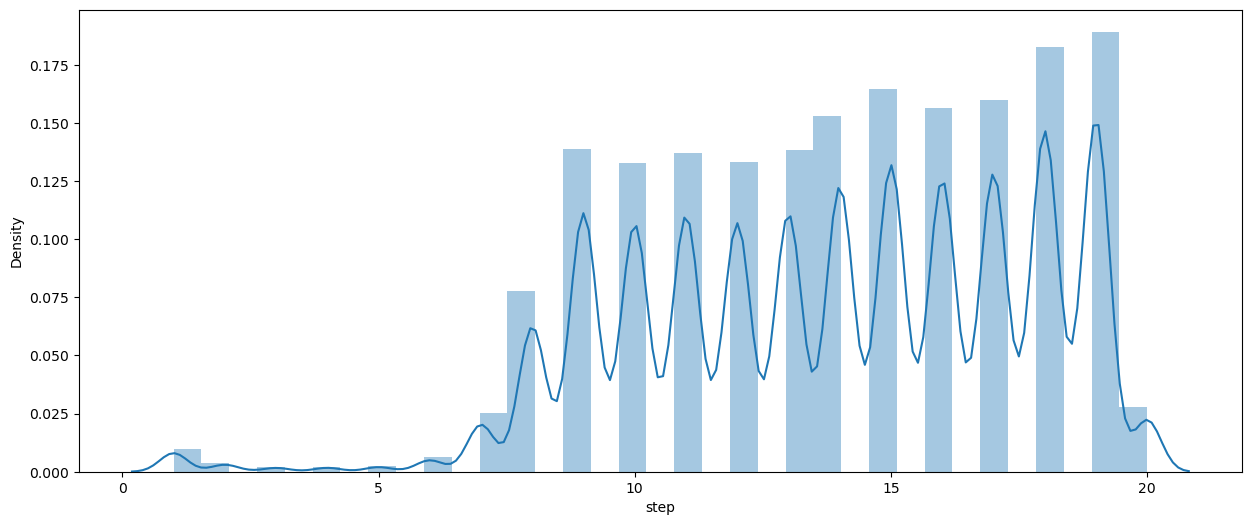

In [11]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=35)

In [12]:
#different data type of columns
df.dtypes.value_counts()

float64    5
int64      3
object     3
Name: count, dtype: int64

In [13]:
# different type of transactions and its count
df['type'].value_counts()

type
CASH_OUT    182316
PAYMENT     164032
CASH_IN     109319
TRANSFER     40729
DEBIT         3603
Name: count, dtype: int64

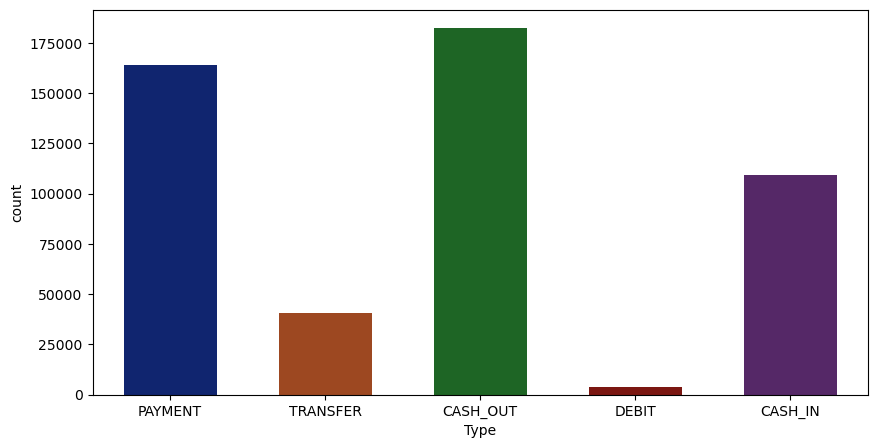

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="type", width= 0.6, palette='dark')
plt.xlabel('Type')
plt.show()

In [15]:
#min and maximum amount of transaction
min(df['amount']), max(df['amount'])

(0.1, 10000000.0)

In [16]:
df['isFraud'].value_counts()

isFraud
0    499766
1       233
Name: count, dtype: int64

### Exploratory Data Analysis

In [18]:
# percentage of fraud transactions

total_fraud_transaction= (df['isFraud'].sum()/len(df))*100
print(f"Percentage of fraud is {total_fraud_transaction} %")

Percentage of fraud is 0.046600093200186404 %


In [19]:
# transaction statistics

fraud_counts = df['isFraud'].value_counts()
total_fraud = fraud_counts.get(1, 0)  # Fraud transactions
total_non_fraud = fraud_counts.get(0, 0)  #Not fraud transactions
avg_transaction_amount= df['amount'].mean()

print("Total number of transactions: ",df.shape[0])
print("Number of fraud transactions: ", total_fraud)
print("Numbe of non fraud transactions: ", total_non_fraud)
print("Average transaction amount: ", avg_transaction_amount)

Total number of transactions:  499999
Number of fraud transactions:  233
Numbe of non fraud transactions:  499766
Average transaction amount:  166393.87893715792


In [20]:
# Most active users

most_active_users = df['nameOrig'].value_counts().reset_index()
most_active_users.columns = ['nameOrig', 'transaction_count']
top_active_users = most_active_users.head(10) 
print(top_active_users)

      nameOrig  transaction_count
0   C189326840                  2
1   C779875094                  2
2   C260230637                  2
3   C262409479                  2
4   C375315317                  2
5   C675934000                  2
6  C1250194175                  2
7    C44568807                  2
8  C1171525077                  2
9  C1999539787                  2


In [21]:
# Most common recipients for fraudulent transactions

fraudulent_transactions = df[df['isFraud'] == 1]
common_recipients = fraudulent_transactions['nameDest'].value_counts().reset_index()
common_recipients.columns = ['recipient', 'fraud_count']
top_common_recipients = common_recipients.head(10)  # Change the number as needed
print(top_common_recipients)


     recipient  fraud_count
0   C185805228            2
1   C410033330            2
2   C200064275            2
3   C553264065            1
4  C1966002811            1
5  C2041291172            1
6  C1662761228            1
7  C2009346140            1
8  C1562904239            1
9  C1755380031            1


In [22]:
# Distribution of transaction types among fraudulent and non-fraudulent transactions

transaction_distribution = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
transaction_distribution.columns = ['Non-Fraudulent', 'Fraudulent']
print(transaction_distribution)

          Non-Fraudulent  Fraudulent
type                                
CASH_IN           109319           0
CASH_OUT          182195         121
DEBIT               3603           0
PAYMENT           164032           0
TRANSFER           40617         112


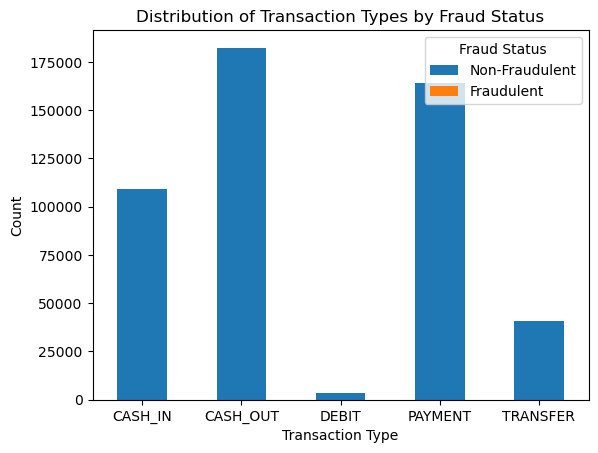

In [23]:
transaction_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud Status')
plt.show()

**Observation** The amount of fraudlent transactions are so low in comparison to non fraudlent transaction, that its presence in the bar chart almost looks negligible

In [25]:
# Correlation between balance changes and fraud occurrences

df['balance_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
correlation = df[['balance_change', 'isFraud']].corr().iloc[0, 1]
print(f'Correlation between balance change and fraud occurrences: {correlation:.2f}')

Correlation between balance change and fraud occurrences: -0.14


**Observation** `Moderate Strength` correlation coefficient, meaning there is some relationship between balance changes and fraud occurrences, but it's not particularly pronounced.

In [27]:
# Pair of sender and receiver names along with top transactions 
transaction_pairs = df.groupby(['nameOrig', 'nameDest']).agg(
    transaction_count=('amount', 'size'), 
    total_amount=('amount', 'sum')
).reset_index()

# Display the top pairs by transaction count and total amount
top_pairs = transaction_pairs.sort_values(by='total_amount', ascending=False).head(30)
print(top_pairs)

           nameOrig     nameDest  transaction_count  total_amount
331709   C351297720   C766681183                  1   10000000.00
271229  C2050703310  C1622860679                  1   10000000.00
348522   C416779475   C380259496                  1   10000000.00
426461     C7162498   C945327594                  1   10000000.00
471449   C890128330  C1192472312                  1    6419835.27
92548    C135832352  C2009346140                  1    6188514.81
418668   C686187434  C1562904239                  1    6188514.81
263783  C2022065686   C460989529                  1    6072832.27
316720   C293394374  C1856036778                  1    5677662.29
151968  C1588880909  C1570256460                  1    5460002.91
413643   C666654362  C1726301214                  1    5460002.91
389879   C574755786  C1737918957                  1    5082871.40
383633   C551242513    C66893623                  1    5077695.81
395788    C59768119  C1387210478                  1    4923413.80
361853   C

### Feature encoding

In [29]:
df['type'].replace({'PAYMENT':0, 'CASH_IN':1, 'CASH_OUT':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [30]:
df['type'].value_counts()

type
2    182316
0    164032
1    109319
3     40729
4      3603
Name: count, dtype: int64

In [31]:
# dropping non integer values from the dataset

df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [32]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0,-9839.64
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1864.28
2,1,3,181.00,181.0,0.00,0.0,0.0,1,0,-181.00
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0,-181.00
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0,-11668.14


<Axes: >

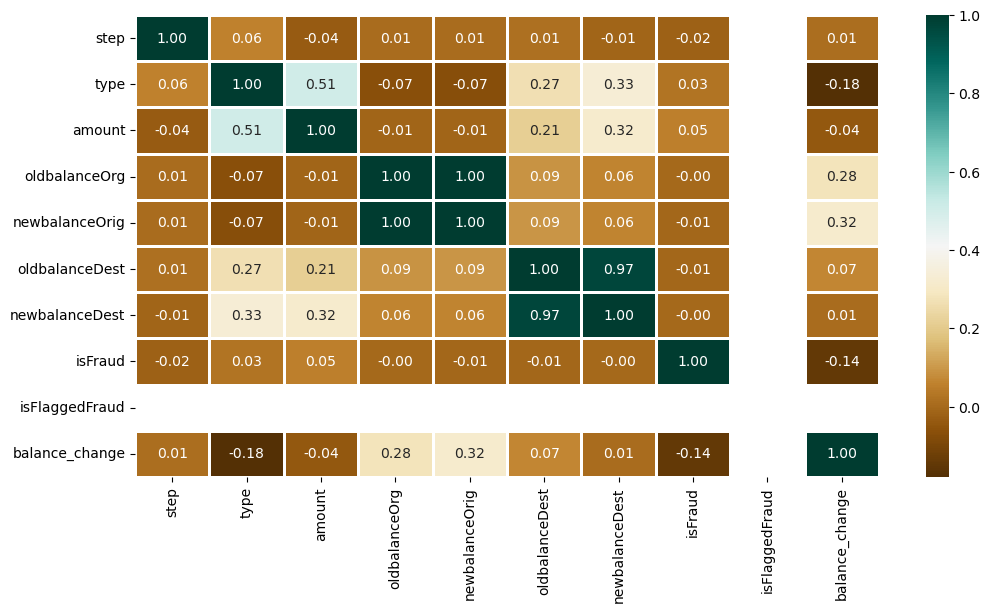

In [33]:
# correlation of each numerical columns 

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [34]:
df.shape

(499999, 10)

In [35]:
#dropping target variable from the dataset, and creating new variable from the dataset

x = df.drop(['isFraud'], axis=1)
print(x.shape)

y = df['isFraud']
print(y.shape)

(499999, 9)
(499999,)


### Preprocessing and Model Building

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(criterion='entropy',max_depth='20', min_samples_split='5')

param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parametres:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred = grid_search.predict(x_test)

Best Parametres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.9995999987499843


### Model Evaluation 

In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1_Score Score: {f1_score}")

Confusion Matrix:
 [[99952     5]
 [   29    14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99957
           1       0.74      0.33      0.45        43

    accuracy                           1.00    100000
   macro avg       0.87      0.66      0.73    100000
weighted avg       1.00      1.00      1.00    100000

Accuracy Score: 0.99966
Precision Score: 0.7368421052631579
Recall Score: 0.32558139534883723
F1_Score Score: 0.45161290322580644


In [41]:
# Examine the number of fraudulent vs legitimate transactions

print(y_train.value_counts())
print(y_test.value_counts())

isFraud
0    399809
1       190
Name: count, dtype: int64
isFraud
0    99957
1       43
Name: count, dtype: int64


**Observation:** The dataset is highly imbalanced, accuracy is not the best metric. Instead, we focus on precision, recall and F1 score of the minority class, i.e. fraudlent transactions.

### Model Comparison
**RandomForestClassifier** An ensemble method that aggregates multiple decision trees.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with verbose parameter to see continous progress
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3)

print("Starting grid search...")
grid_search_rf.fit(x_train, y_train)
print("Grid search completed")

print("Best Params for RF:", grid_search_rf.best_params_)
print("Best Score for RF:", grid_search_rf.best_score_)

Starting grid search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid search completed
Best Params for RF: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for RF: 0.9996249989999875


### Checking for overfitting
As the prediction through both decision tree and random forest has  extremely high score **0.9996249**, our model might be predicting biased due to highly imbalanced data. Hence, we check for overfitting to further validate the model and ensure it generalizes well.

In [83]:
#applying cross validation on Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth=20)  # Ensure max_depth is an integer
cv_scores_tree = cross_val_score(model, x, y, cv=5)
print(f"Cross-Validation Scores for Decision Tree: {cv_scores_tree}")
print(f"Mean CV Accuracy for Decision Tree: {cv_scores_tree.mean()}")


Cross-Validation Scores for Decision Tree: [0.27367 0.99955 0.99966 0.91696 0.99969]
Mean CV Accuracy for Decision Tree: 0.8379059993799938


In [85]:
# applying cross validation on Random forest

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, x, y, cv=5)
print(f"Cross-Validation Scores for Random Forest: {cv_scores}")
print(f"Mean CV Accuracy for Random Forest: {cv_scores.mean()}")

Cross-Validation Scores for Random Forest: [0.27383 0.99964 0.99969 0.99969 0.99975]
Mean CV Accuracy for Random Forest: 0.8545199994999949


**Observation** Random Forest is performing better

As we witness a high class imbalance of target variable (Fraudlent and Non Fraudlent), we use gradient boosted algorithms, so that algorithm could focus on minority class (Fraudlent Transactions), by giving it more weightage.

### Using Boosted algorithms for improvement
(XGBoost, LightGBM, CatBoost)

### Handling Class Imbalance
Using `class weights` Assigning higher weights to the minority class

1. In **XGBoost**, you can use the scale_pos_weight parameter.
2. In **LightGBM**, the class_weight parameter works similarly.
3. In **CatBoost**, it automatically detects class imbalance, but you can also use class_weights.

In [98]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Instantiate the model with some basic parameters
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)

# Perform cross-validation to check performance
cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='roc_auc')

print(f"XGBoost CV AUC Scores: {cv_scores}")
print(f"XGBoost Mean CV AUC Score: {cv_scores.mean()}")

# Fit the model and make predictions
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)


XGBoost CV AUC Scores: [0.97408095 0.97875389 0.97297828 0.99326045 0.98676444]
XGBoost Mean CV AUC Score: 0.9811676004686806


In [100]:
# LightGBM

import lightgbm as lgb

# Instantiate the model with class_weight
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lgb_model, x_train, y_train, cv=5, scoring='roc_auc')

print(f"LightGBM CV AUC Scores: {cv_scores}")
print(f"LightGBM Mean CV AUC Score: {cv_scores.mean()}")

# Fit the model and make predictions
lgb_model.fit(x_train, y_train)
y_pred = lgb_model.predict(x_test)


[LightGBM] [Info] Number of positive: 152, number of negative: 319847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 319999, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 152, number of negative: 319847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 319999, number of used features: 8
[LightGBM] [Info] [binar

**Observation:** 
1. Number of positive: 152, number of negative: 319847
2. LightGBM automatically chooses row-wise multi-threading to optimize training.
3. Number of data points in the train set: 319999, number of used features: 8
4. LightGBM CV AUC Scores: [0.98176667   0.98200675   0.96801918   0.99460928   0.98999315]. AUC scores closer to 1.0 indicate a good ability to distinguish between classes. 0.96801 may happened due to class imbalance or noise in the dataset.5. 
LightGBM Mean CV AUC Score: 0.983279006195023, which is an excellent result. It shows that LightGBM is performing very well overall, with minimal variance between folds.1

In [108]:
# CatBoost

from catboost import CatBoostClassifier

# Instantiate the model
cat_model = CatBoostClassifier(class_weights=[1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])], random_state=42, verbose=0)

# Perform cross-validation
cv_scores = cross_val_score(cat_model, x_train, y_train, cv=5, scoring='roc_auc')

print(f"CatBoost CV AUC Scores: {cv_scores}")
print(f"CatBoost Mean CV AUC Score: {cv_scores.mean()}")

# Fit the model and make predictions
cat_model.fit(x_train, y_train)
y_pred = cat_model.predict(x_test)


CatBoost CV AUC Scores: [0.98304326 0.98009104 0.97024968 0.99241054 0.98818092]
CatBoost Mean CV AUC Score: 0.9827950875925803


**Observation:** LightGBM algorithm gives highest Cross Validation AUC Score of 0.98327.

### Evaluate model performance on Minority Class
We evaluate the model performance on the test set using metrics suitable for imbalanced data on most promising algorithm i.e. xgboost here, such as:

1. Precision, Recall, F1-score
2. AUC-ROC Curve
3. Confusion Matrix

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lgb_model.predict(x_test)

# Print classification report for precision, recall, f1-score
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99957
           1       0.03      0.88      0.05        43

    accuracy                           0.99    100000
   macro avg       0.51      0.94      0.52    100000
weighted avg       1.00      0.99      0.99    100000

[[98629  1328]
 [    5    38]]


1. True Positives (TP): Fraudulent transactions correctly identified.
2. False Negatives (FN): Fraudulent transactions missed by the model.
3. False Positives (FP): Non-fraudulent transactions incorrectly flagged as fraud.
4. True Negatives (TN): Non-fraudulent transactions correctly classified.

[[TP, FN],[FP, TN]]

**Observation** FN is way higher than FP, hence we focus on Recall.

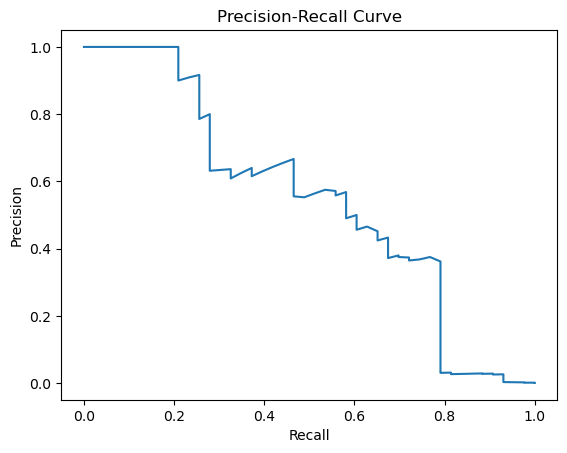

In [132]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_prob = lgb_model.predict_proba(x_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Baseline Model: Predicting No Fraud (Majority Class Model)
This baseline assumes that the model always predicts the majority class (non-fraudulent transactions) and never detects fraud. For highly imbalanced datasets, this is a simple but often informative comparison. In our case, where fraud is rare, the model would predict "non-fraud" (the negative class) for all transactions.

In [136]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Predict all as non-fraud (the majority class, 0 in most cases)
y_pred_majority = [0] * len(y_test)

# Evaluate the accuracy and AUC of the majority class model
majority_accuracy = accuracy_score(y_test, y_pred_majority)
majority_auc = roc_auc_score(y_test, y_pred_majority)

# Print out classification report (Precision, Recall, F1-Score)
print("Majority Class Model (Predicts No Fraud):")
print(f"Accuracy: {majority_accuracy}")
print(f"AUC: {majority_auc}")
print(classification_report(y_test, y_pred_majority))

Majority Class Model (Predicts No Fraud):
Accuracy: 0.99957
AUC: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99957
           1       0.00      0.00      0.00        43

    accuracy                           1.00    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      1.00      1.00    100000



### Baseline Model: Random Guessing Model
This baseline randomly assigns each transaction as either fraudulent or non-fraudulent. This will give a sense of how much better our actual model performs compared to random guessing.

In [140]:
import numpy as np

# Predict randomly (0 for non-fraud, 1 for fraud)
np.random.seed(42)  # For reproducibility
y_pred_random = np.random.randint(2, size=len(y_test))

# Evaluate the random guessing model
random_accuracy = accuracy_score(y_test, y_pred_random)
random_auc = roc_auc_score(y_test, y_pred_random)

# Print out classification report (Precision, Recall, F1-Score)
print("Random Guessing Model:")
print(f"Accuracy: {random_accuracy}")
print(f"AUC: {random_auc}")
print(classification_report(y_test, y_pred_random))


Random Guessing Model:
Accuracy: 0.49942
AUC: 0.5287671373109042
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     99957
           1       0.00      0.56      0.00        43

    accuracy                           0.50    100000
   macro avg       0.50      0.53      0.33    100000
weighted avg       1.00      0.50      0.67    100000



### Compare Baseline with Your Model
Now that we have the baseline models (majority class and random guessing), we directly compare their performance against our best model LightGBM.

In [142]:
# LightGBM predictions
y_pred_lgbm = lgb_model.predict(x_test)

# Evaluate LightGBM model
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_auc = roc_auc_score(y_test, y_pred_lgbm)

# Compare the results
print("LightGBM Model:")
print(f"Accuracy: {lgbm_accuracy}")
print(f"AUC: {lgbm_auc}")
print(classification_report(y_test, y_pred_lgbm))

# Now compare with the baselines
print(f"\nMajority Class Model AUC: {majority_auc}")
print(f"Random Guessing Model AUC: {random_auc}")
print(f"LightGBM Model AUC: {lgbm_auc}")


LightGBM Model:
Accuracy: 0.98667
AUC: 0.9352176086880148
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99957
           1       0.03      0.88      0.05        43

    accuracy                           0.99    100000
   macro avg       0.51      0.94      0.52    100000
weighted avg       1.00      0.99      0.99    100000


Majority Class Model AUC: 0.5
Random Guessing Model AUC: 0.5287671373109042
LightGBM Model AUC: 0.9352176086880148


**Observation:** LightGBM model AUC much higher than Random Guessing Model and Majority Class Model, it confirms that our model is effective in distinguishing between fraudulent and non-fraudulent transactions. Also precision and recall improved.